# A/B test 


**Цель проекта**: увеличение выручки интернет-магазина.

**Задачи проекта**: приоритизация гипотез, запуск A/B-теста и анализ его результатов.

**Описание данных**

**Данные для первой части**

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Установим библиотеки:

In [ ]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

Загрузим данные, для дальнешего изучения нам предоставлено 3 датасета:

In [ ]:
hypothesis = pd.read_csv('.../datasets/hypothesis.csv')


In [ ]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Заменим названия столбцов:

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [ ]:
orders = pd.read_csv('.../datasets/orders.csv', sep=',')

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors = pd.read_csv('.../datasets/visitors.csv', sep=',')

In [ ]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors.duplicated().sum()

0

Данные чистые, пропусков и дубликатов нет. Мы изменили названия столбцов в ДФ hypothesis. Можно приступать к решению поставленных задач.

**ЧАСТЬ 1. Приоритизация гипотез.**

**Фреймворк ICE для приоритизации гипотез.**

In [ ]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


По ICE самыми приоритетными являются гипотезы 8, 0, 7.

**Фреймворк RICE для приоритизации гипотез.**

In [ ]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['reach'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


По RICE самыми приоритетными являются гипотезы 7, 2, 0.

По RICE гипотеза №8 уже не стоит в топе приоритетных. В формуле этого фреймворка присутствует параметр охвата reach, он и повлиял на разницу результатов. То есть гипотеза №7 будет самой приоритетной, так как охватит большее число пользователей. За ней пойдут 2 и 0.

**ЧАСТЬ 2. Анализ A/B-теста**

**Кумулятивная выручка по группам.**

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:

date — дата;

group — группа A/B-теста (A или B);

orders — кумулятивное количество заказов на указанную дату в указанной группе;

buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.



In [ ]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [ ]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [ ]:
#cоздадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates() 

#объявим переменную ordersAggregated
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объявим переменную visitorsAggregated. ordersAggregated и visitorsAggregated отсортируем по столбцам 'date', 'group'
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#присвоим столбцам cumulativeData необходимые названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
 
cumulativeData.head(5) 


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.
Построим графики кумулятивной выручки по дням по группам.


In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


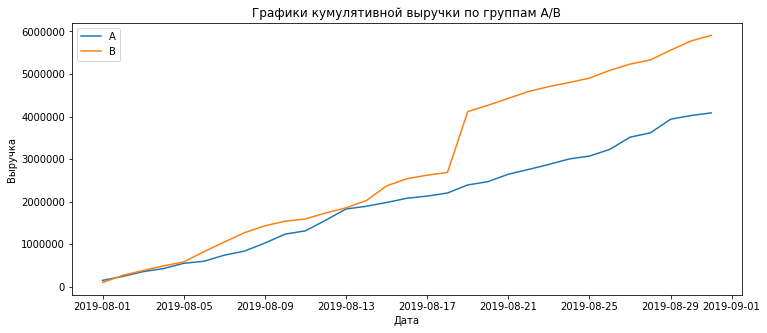

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

Первые 2 дня наблюдался одинаковый рост выручки в двух группах. С 5го по 13ое августа группа В стала показывать немногим бОльшую выручку. 18 августа в группе В произошел резкий скачок, и дальше рост продолжился, выручка накапливалась. К сентябрю выручка группы А составила 4 млн., группы В - 6 млн. Возможно, имеет место выброс, например, заказ на большую сумму или огромная закупка. Тем не менее, в целом в обоих группах мы наблюдаем линейный рост, но в группе В он выше.

**Кумулятивный средний чек по группам A/B**

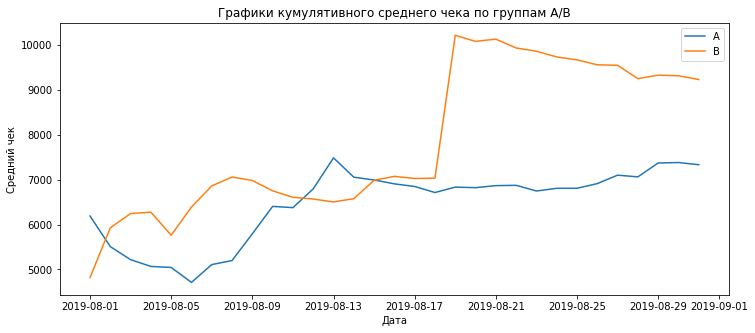

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.legend()
plt.show()


До 18 августа средние чеки в двух группах колебались, в каждой наблюдаем и рост, и падение. Однако, в группе В резкий скачок все же был связан с покупкой или покупками на круппную сумму, после чего мы видим небольшой спад, и это похоже на аномалию. Чек группы А после роста 13 августа стабильно держится в районе 7000.

**Относительное изменение кумулятивного среднего чека группы B к группе A.**


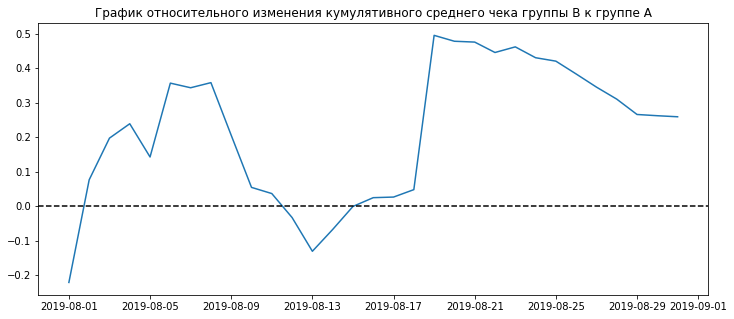

In [ ]:
#объединим таблицы cumulativeRevenueA и cumulativeRevenueB 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

На большей части графика средний чек по группе B выше, чем по группе A. Главное, на что нам стоит обратить внимание - резкие колебания, как на рост, так и на спад. Следует отфильтровать аномальные значения. Здесь мы также видим описанную выше дату 18 августа, когда произошла очень крупная покупка. 

**Кумулятивная конверсия по группам.**

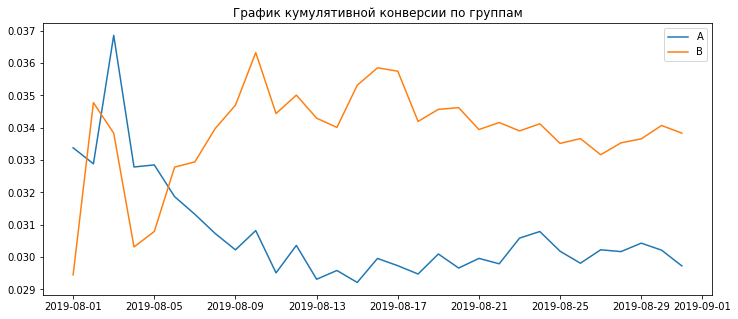

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,5)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.show()


Накопительная конверсия по группе B практически на всем протяжении лежит значительно выше накопительной конверсии группы A. В первые дни конверсия группы А показала резкий скачок, за ним пошел резкий спад, и после 8 августа кривая стабилизировалась. Аналогичный процесс мы наблюдаем в группе В, только после первой недели кривая В пошла вверх и стабильно держалась в районе 0,35, а В пошла вниз, и стабильно держалась в районе 0,3. График в целом выглядит симметричным.

**Относительное изменение кумулятивной конверсии группы B к группе A.**

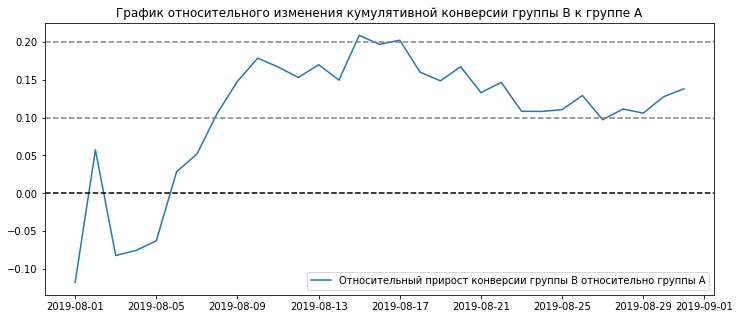

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))  
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show() 

Конверсия группы В после нестабильных первых дней теста уверено растет с 7 августа, далее демонстрирует относительный прирост на уровне 0,1-0,2. Таким образом, конверсия в группе B стабильно лучше конверсии в группе A на 10%.

**Количество заказов по пользователям.**

In [ ]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['transactionId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,transactionId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


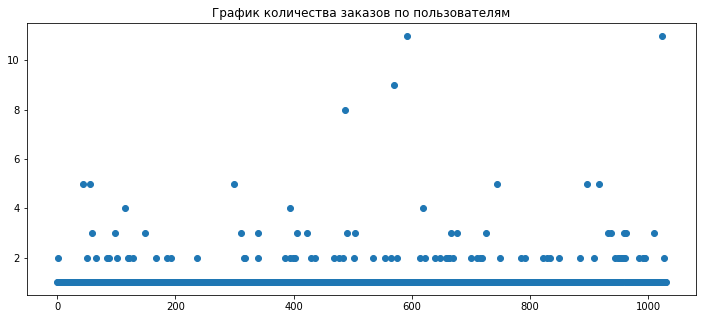

In [ ]:
o_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,5)) 
plt.scatter(o_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.show()

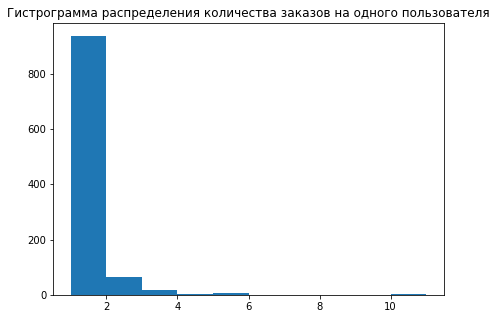

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. На точечном графике видно, что есть пользователи, которые заказывали 8 раз и больше, таких 4 человека. Тех, кто заказывал больше трех раз, мало. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Посчитаем выборочные перцентили количества заказов на одного пользователя



**Определение аномальных пользователей.**

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

5% пользователей сделало больше двух заказов, 1% пользователей сделало больше четырех заказов. Исходя из распределений количества заказов на точечном графике, будем считать аномальным значением выше трех заказов, т.е. 4-11.

**Стоимости заказов.**

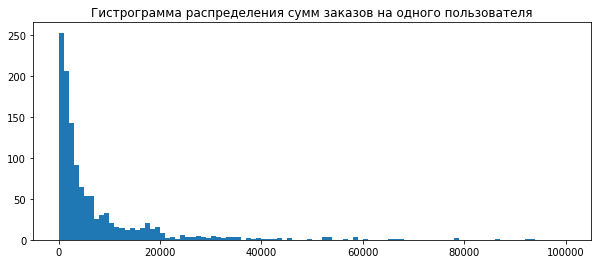

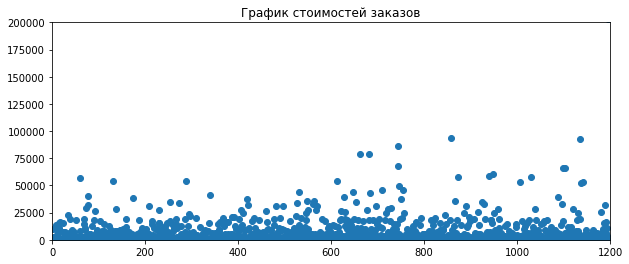

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()
r_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(r_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.axis([0, 1200, 0, 200000])
plt.show()

Основная масса пользователей совершает заказы на сумму до 20-25 тыс.руб. Выбросами кажутся покупки выше 75 тыс.руб. Сделаем график крупнее.

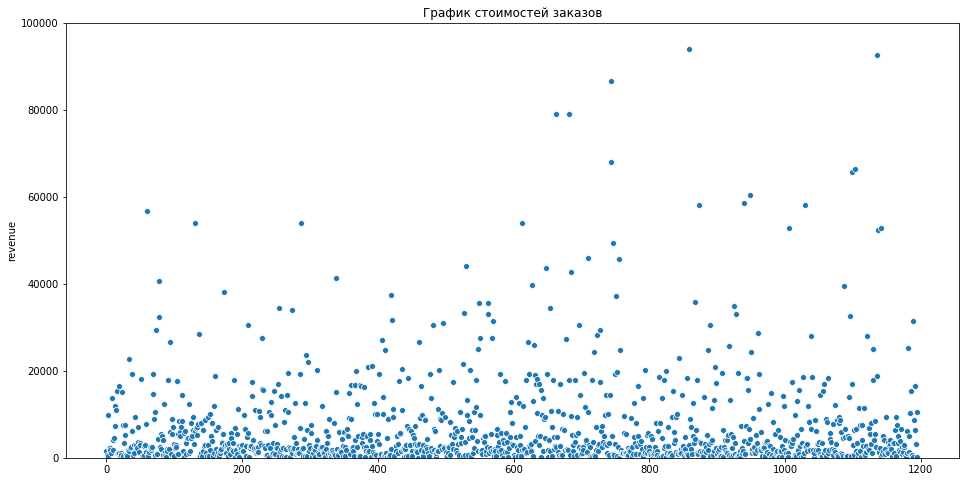

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=r_values, y=orders['revenue'])
plt.ylim(0, 100000);
plt.title('График стоимостей заказов')
plt.show()

Большинство покупок совершается на сумму 10 000 руб. Выше 50 000 есть лишь единичные покупки.

**Определение аномальных заказов.**

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% пользователей совершили заказ на сумму выше 28 000 руб., 1% пользователей совершили заказ на сумму выше 58233,2 руб. Исходя из распределения на точечном графике, обозначим границу аномальных заказов свыше 40 000 руб.

**Статистическая значимость различий в конверсии между группами по «сырым» данным.**

Создадим переменные
ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.
Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Посчитаем статистическую значимость различия конверсии по результатам двух недель теста. Применим тест Манна-Уитни.
Выведем p-value для сравнения конверсии между группами. Вычислим и выведем относительное различие в конверсии между группами.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
 
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
 
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
 
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
 
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
 
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
 
print(data.head(5))
 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 
 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
 
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

P-value < 0.05, поэтому мы отвергаем гипотезу об отсутствии статистически значимых различий в конверсии - конверсия группы А отличается от конверсии группы В. Конверсия группы В на сырых данных статистически выше на 13.8%.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Выведем p-value для сравнения средних чеков между группами. Округлим p-value до трёх знаков после запятой.
Выведем относительный прирост среднего чека группы B, округлив до трёх знаков после запятой.


In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.365
0.259


P-value значительно больше 0,05, поэтому мы принимаем гипотезу об отсутствии статистически значимых различий в среднем чеке заказа между группами А и В по «сырым» данным. При этом относительное различие между средними чеками 25%.

**Статистическая значимость различий в конверсии между группами по «очищенным» данным.**

Очистим данные от аномалий. Мы определили, что аномалиями будем считать:

количество заказов выше трех,

стоимость заказов свыше 40 000 руб.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 40 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)


1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64

Теперь у нас есть список аномальных пользователей. После их удаления мы сможем посчитать статистическую значимость, чтобы выяснить, есть ли существенные различия между группами с отфильтрованными данными.

Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей. Создадим переменные sampleAFiltered и sampleBFiltered, в которых будут очищенные данные о заказах, не включая аномальных пользователей.
Выведем p-value для сравнения конверсии между очищенными группами. Округлим p-value до 3 знаков после запятой. Выведем относительный прирост конверсии очищенной группы B, округлив до 3 знаков после запятой.



In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.005
0.164


p-value < 0.05, это означает, что по очищенным данным в конверсии групп A и B разница статистически значима. Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 16.4%. После очистки данных показатель конверсии группы В увеличился.

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

Выведем p-value для сравнения средних чеков между очищенными группами. Округлим p-value до трёх знаков после запятой. Выведем относительный прирост среднего чека очищенной группы B, округлив до трёх знаков после запятой.


In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(
    orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
    ]['revenue'], orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),) ]['revenue'],)[1]))      
print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',\
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
    /orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

0.355
0.060


p-value больше уровня значимости 0.05, значит в этом случае нельзя отвергнуть нулевую гипотезу об отсутствии статистической значимости между размером среднего чека сравниваемых групп. То есть нет статистически значимых различий. Cредний чек группы В выше среднего чека группы А всего на 6%, а не на 25%, как в случае с сырыми данными.

**Общий вывод по результатам А/В теста:**

Конверсия группы А отличается от конверсии группы В, и эта разница является статистически значимой. Конверсия группы В на сырых данных выше на 13.8%. Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 16.4%. После фильтрации данных от аномальных значений показатель конверсии группы В увеличился.

Относительное различие между средними чеками групп А и В составляет 25% на “сырых” данных и 6% на очищенных. Но статистически значимыми эти  различия не являются.

Данный тест можно остановить и считать успешно проведенным. Конверсия группы B статистически значимо выше, чем у группы A на 16,4%, это дает нам основания считать победителем группу В.
